<a href="https://colab.research.google.com/github/ABNERP12/Evaluacion-actividad-/blob/main/etapa_3_Evaluacion.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
#Importamos librerías requeridas
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
#Instalamos librería para análisis de variables categóricas
%pip install funpymodeling

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 215.5/215.5 kB 8.3 MB/s eta 0:00:00
  Created wheel for sklearn: filename=sklearn-0.0.post4-py3-none-any.whl size=2973 sha256=597a0955fd439e758922a29ce3cfbc10405dc5c07f10e2bfab42e6aed851ba8f
  Stored in directory: /root/.cache/pip/wheels/46/b8/69/4f7789b7d2fc0718a44cbc4ae5d40970a40c22c472ae50f0a1
Successfully built sklearn
  Attempting uninstall: seaborn
    Found existing installation: seaborn 0.12.2
    Uninstalling seaborn-0.12.2:
      Successfully uninstalled seaborn-0.12.2


In [ ]:
#Importamos las librerias pandas, numpy y matplotlib respectivamente
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from funpymodeling.exploratory import freq_tbl 

In [ ]:
españa = pd.read_csv('Datos_limpios_IQR_España.csv')
mexico = pd.read_csv('Datos_limpios_IQR_mexico.csv')
usa = pd.read_csv('Datos_limpios_DSV_california.csv')

#españa.describe()
#españa.info()

###nulos

In [ ]:
españa.fillna(method='bfill', inplace=True)

In [ ]:
#Identificar valores nulos por columna
valores_nulos=españa.isnull().sum().sum()
valores_nulos

0

In [ ]:
#Identificar valores nulos por columna
valores_nulos=mexico.isnull().sum().sum()
valores_nulos

0

In [ ]:
#Identificar valores nulos por columna
valores_nulos=usa.isnull().sum().sum()
valores_nulos

0

In [ ]:
freq_tbl(mexico)

                                listing_url  frequency  percentage  \
0      https://www.airbnb.com/rooms/2056638          1    0.000425   
1     https://www.airbnb.com/rooms/14866565          1    0.000425   
2     https://www.airbnb.com/rooms/14841251          1    0.000425   
3     https://www.airbnb.com/rooms/14340825          1    0.000425   
4     https://www.airbnb.com/rooms/15206919          1    0.000425   
...                                     ...        ...         ...   
2350  https://www.airbnb.com/rooms/10069191          1    0.000425   
2351   https://www.airbnb.com/rooms/9445699          1    0.000425   
2352   https://www.airbnb.com/rooms/8974916          1    0.000425   
2353  https://www.airbnb.com/rooms/10069785          1    0.000425   
2354  https://www.airbnb.com/rooms/18210539          1    0.000425   

      cumulative_perc  
0            0.000425  
1            0.000849  
2            0.001274  
3            0.001699  
4            0.002123  
...            

In [ ]:
mexicofreq=freq_tbl(mexico)
españafreq=freq_tbl(españa)
usafreq=freq_tbl(usa)

##a) host_response_time 


In [ ]:
#Obtengo un análisis univariado de una variable categórica en específico
table1= freq_tbl(mexico['host_response_time'])
table1.set_index('host_response_time', inplace=True)
table1 = table1.rename(columns={'percentage': 'percentage_MEX'})
table1

,frequency,percentage_MEX,cumulative_perc
host_response_time,,,
within an hour,1289,0.547346,0.547346
sin registro,410,0.174098,0.721444
within a few hours,335,0.142251,0.863694
within a day,222,0.094268,0.957962
a few days or more,99,0.042038,1.000000


In [ ]:
#Obtengo un análisis univariado de una variable categórica en específico
table2= freq_tbl(españa['host_response_time'])
table2.set_index('host_response_time', inplace=True)
table2 = table2.rename(columns={'percentage': 'percentage_ESP'})
table2

,frequency,percentage_ESP,cumulative_perc
host_response_time,,,
within an hour,761,0.504307,0.504307
within a few hours,296,0.196156,0.700464
within a day,194,0.128562,0.829026
sin registro,194,0.128562,0.957588
a few days or more,62,0.041087,0.998675
Entire villa,2,0.001325,1.000000


In [ ]:
#Obtengo un análisis univariado de una variable categórica en específico
table3= freq_tbl(usa['host_response_time'])
table3.set_index('host_response_time', inplace=True)
table3 = table3.rename(columns={'percentage': 'percentage_USA'})
table3

,frequency,percentage_USA,cumulative_perc
host_response_time,,,
within an hour,1060,0.516821,0.516821
within a few hours,404,0.196977,0.713798
sin registro,385,0.187713,0.901511
within a day,179,0.087275,0.988786
a few days or more,23,0.011214,1.000000


In [ ]:
host_response_time  = pd.merge(pd.merge(table1, table2, on='host_response_time', how='outer'), table3, on='host_response_time', how='outer')
host_response_time  = host_response_time [['percentage_MEX', 'percentage_ESP',"percentage_USA"]]
host_response_time=host_response_time.drop('Entire villa')#, inplace=True)
host_response_time 

,percentage_MEX,percentage_ESP,percentage_USA
host_response_time,,,
within an hour,0.547346,0.504307,0.516821
sin registro,0.174098,0.128562,0.187713
within a few hours,0.142251,0.196156,0.196977
within a day,0.094268,0.128562,0.087275
a few days or more,0.042038,0.041087,0.011214


In [ ]:
#df = pd.merge(table1, table2, table3, on='host_response_time', how='outer')
#df

Text(0, 0.5, 'Frecuencia')

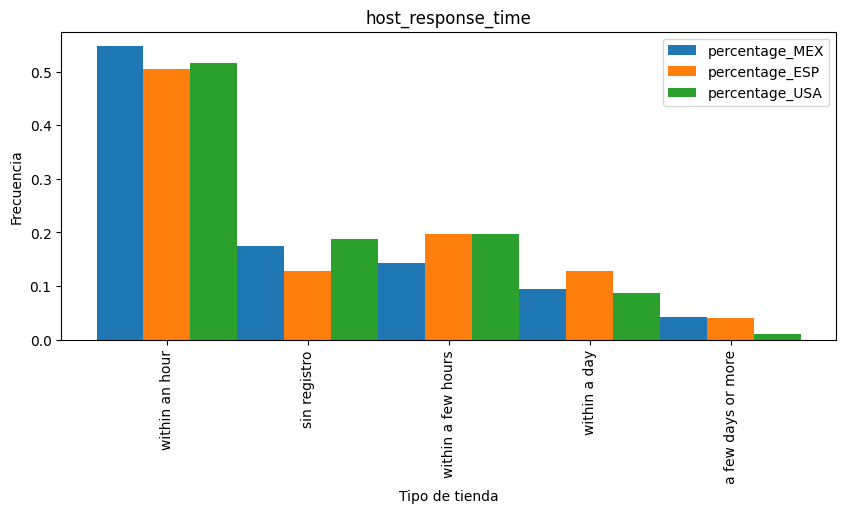

In [ ]:
#Realizamos grafico de barras del dataframe filtrado
host_response_time.plot(kind = 'bar', width=1, figsize=(10,4))
plt.title('host_response_time')
plt.xlabel('Tipo de tienda')
plt.ylabel('Frecuencia')

**host_response_time**

En esta grafica podemos observar la comparacion que existe entre el tiempo que tardan en dar respuesta a los clientes en las distintas ciudades donde observamos que en el DF, mexico, mas del 50% responden drntro de una hora siendo la ciudad que menos se demora y vemos que entre mas tiempo pasa se reduce la relevancia de la ciudad mientras que california y girona todavia hay registros que tardan en responder de 1 a dos dias.  

##d) property_type

In [ ]:
#Obtengo un análisis univariado de una variable categórica en específico
table1= freq_tbl(mexico['property_type'])
table1.set_index('property_type', inplace=True)
table1 = table1.rename(columns={'percentage': 'percentage_MEX'})
# reducimos el numero de datos y solo dejamos las 10 columnas con mas frecuencias ya que consideramos las mas relevantes 
table1=table1.head(10)
table1

,frequency,percentage_MEX,cumulative_perc
property_type,,,
Entire rental unit,856,0.363482,0.363482
Private room in rental unit,404,0.171550,0.535032
Private room in home,311,0.132059,0.667091
Entire condo,187,0.079406,0.746497
Entire loft,170,0.072187,0.818684
Private room in condo,74,0.031423,0.850106
Entire home,74,0.031423,0.881529
Entire serviced apartment,51,0.021656,0.903185
Entire guest suite,25,0.010616,0.913800


In [ ]:
#Obtengo un análisis univariado de una variable categórica en específico
table2= freq_tbl(usa['property_type'])
table2 = table2.rename(columns={'percentage': 'percentage_USA'})
table2.set_index('property_type', inplace=True)
# reducimos el numero de datos y solo dejamos las 10 columnas con mas frecuencias ya que consideramos las mas relevantes 
table2=table2.head(10)
table2

,frequency,percentage_USA,cumulative_perc
property_type,,,
Entire rental unit,593,0.289127,0.289127
Entire home,274,0.133593,0.422721
Private room in home,253,0.123354,0.546075
Entire condo,194,0.094588,0.640663
Private room in rental unit,181,0.088250,0.728913
Entire guest suite,173,0.084349,0.813262
Room in boutique hotel,92,0.044856,0.858118
Private room in condo,65,0.031692,0.889810
Room in hotel,52,0.025353,0.915163


In [ ]:
#Obtengo un análisis univariado de una variable categórica en específico
table3= freq_tbl(españa['property_type'])
table3.set_index('property_type', inplace=True)
table3 = table3.rename(columns={'percentage': 'percentage_ESP'})
# reducimos el numero de datos y solo dejamos las 10 columnas con mas frecuencias ya que consideramos las mas relevantes 
table3=table3.head(10)
table3

,frequency,percentage_ESP,cumulative_perc
property_type,,,
Entire rental unit,651,0.431412,0.431412
Entire home,347,0.229954,0.661365
Entire condo,100,0.066269,0.727634
Entire villa,77,0.051027,0.778661
Entire cottage,67,0.044400,0.823062
Entire townhouse,50,0.033135,0.856196
Private room in home,28,0.018555,0.874751
Entire loft,25,0.016567,0.891319
Private room in bed and breakfast,22,0.014579,0.905898


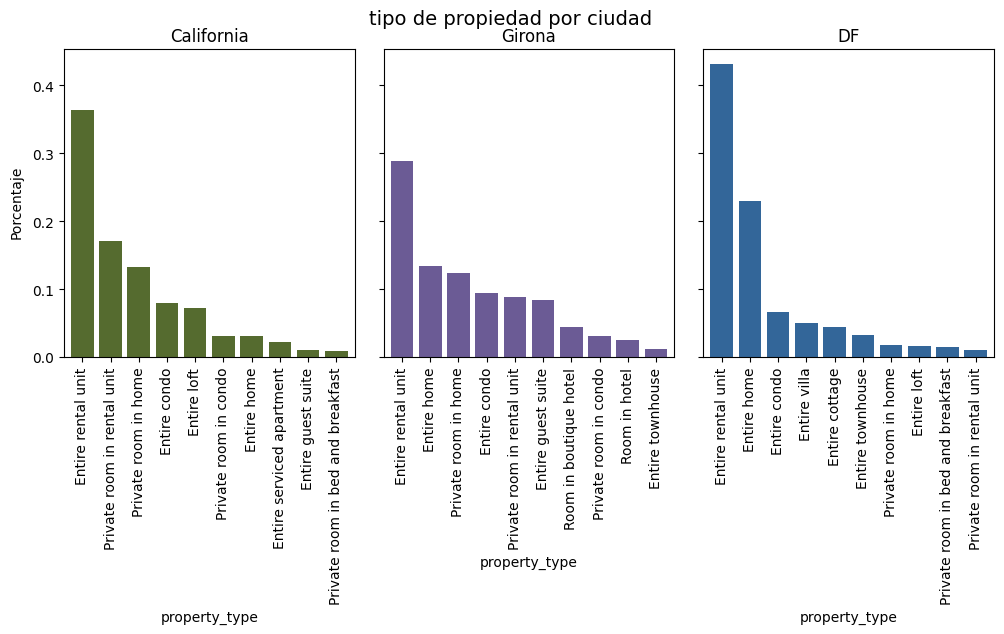

In [ ]:
fig, axs = plt.subplots(1, 3, figsize=(12,4), sharey=True)
plt.subplots_adjust(wspace=0.1)

table1["percentage_MEX"].plot(kind='bar', ax=axs[0], color= '#556B2F', width=0.8)
table2["percentage_USA"].plot(kind='bar', ax=axs[1], color= '#6B5B95', width=0.8)
table3["percentage_ESP"].plot(kind='bar', ax=axs[2], color= '#336699', width=0.8)
axs[0].set_title('DF')
axs[1].set_title('CALIFORNIA')
axs[2].set_title('Girona')

# Agregamos títulos de los ejes
fig.text(0.08, 0.5, 'Porcentaje', va= 'center', rotation='vertical')
fig.suptitle('tipo de propiedad por ciudad ', fontsize=14)
plt.show()

**Tipo de propiedad por ciudad**

En esta grafica observamos que el tipo de propiedad que predomina en cada ciudad es el de unidad de alquiler completa ya que en las tres ciudades es el porcentaje predominante en los registros del data frame sin embargo existe a partir de esa similitud diferencias entre los restantes tipos de propiedad por ejemplo en la ciudad de México la siguiente predominante son las habitaciones privadas en una unidad de alquiler mientras que en California el segundo más relevante es la casa entera al igual que  en Girona

##g)review_scores_cleanliness

In [ ]:
mexico["review_scores_cleanliness"].describe()
usa["review_scores_cleanliness"].describe()

count    2051.000000
mean        4.802706
std         0.206133
min         3.890000
25%         4.720000
50%         4.860000
75%         4.960000
max         5.000000
Name: review_scores_cleanliness, dtype: float64

In [ ]:
df_grouped = mexico.groupby('review_scores_cleanliness').size().reset_index(name='counts')
df_grouped=df_grouped.sort_values(by="review_scores_cleanliness",ascending=False)
df_grouped.set_index('review_scores_cleanliness', inplace=True)
df_grouped

In [ ]:
df_grouped2 = usa.groupby('review_scores_cleanliness').size().reset_index(name='counts')
df_grouped2=df_grouped2.sort_values(by="review_scores_cleanliness",ascending=False)
df_grouped2.set_index('review_scores_cleanliness', inplace=True)
df_grouped2

In [ ]:
df_grouped3 = españa.groupby('review_scores_cleanliness').size().reset_index(name='counts')
df_grouped3=df_grouped3.sort_values(by="review_scores_cleanliness",ascending=False)
df_grouped3.set_index('review_scores_cleanliness', inplace=True)
df_grouped3

In [ ]:
plt.plot(df_grouped['counts'])
plt.show()


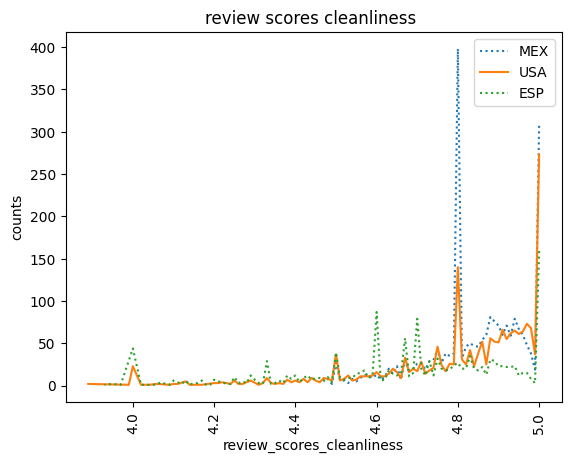

In [ ]:
import matplotlib.pyplot as plt
x=df_grouped['counts']
y=df_grouped2["counts"]
z=df_grouped3["counts"]


plt.plot(x,label='MEX',linestyle="dotted")
plt.plot(y,label='USA')
plt.plot(z,label='ESP',linestyle="dotted")


plt.ylabel("counts")
plt.xlabel("review_scores_cleanliness")

#agregar el nombre 
plt.legend()
plt.xticks(rotation=90)

plt.title("review scores cleanliness ")

plt.show()

**Revisión puntuaciones limpieza**

En esta gráfica podemos observar las puntuaciones de limpieza dentro de los departamentos y viviendas de las distintas ciudades de 0 a 5 105 que las viviendas están muy limpias,por lo que en esta gráfica podemos observar la comparación de las tres ciudades observando que de acuerdo a sus puntuaciones, en  DF México predomina la puntuación de 4.8 con cerca de 4 00 reviews y la puntuación de con cerca de 300 reviews mientras que la ciudad de California se concentra principalmente en la puntuación 5 con cerca de 200 reviews y la ciudad de españa con menos reviews se concentra en la puntuación 5 con cerca de 150,Por lo que podemos decir que en cuestión de limpieza se encuentra en primer lugar la ciudad de DF en segundo lugar California y en tercer lugar Girona España

##***********f)availability_365

In [ ]:
df_describe1=mexico["availability_365"].describe()
df_describe1
df_describe2=usa["availability_365"].describe()
df_describe3=españa["availability_365"].describe()
df_describe3

count    1509.000000
mean      210.463221
std       110.523703
min         0.000000
25%       121.000000
50%       228.000000
75%       307.000000
max       365.000000
Name: availability_365, dtype: float64

In [ ]:
df_grouped = mexico.groupby('availability_365').size().reset_index(name='counts')
df_grouped=df_grouped.sort_values(by="availability_365",ascending=False)
#df_grouped.set_index('availability_365', inplace=True)
df_grouped=df_grouped.describe()#head(10)
#df_grouped.info()
df_grouped

,availability_365,counts
count,336.000000,336.000000
mean,187.533631,7.008929
std,106.842110,14.692975
min,0.000000,1.000000
25%,89.750000,2.000000
50%,189.500000,4.000000
75%,280.250000,7.000000
max,365.000000,189.000000


In [ ]:
df_grouped2 = usa.groupby('availability_365').size().reset_index(name='counts')
df_grouped2=df_grouped2.sort_values(by="availability_365",ascending=False)
#df_grouped.set_index('availability_365', inplace=True)
df_grouped2=df_grouped2.describe()#head(10)
#df_grouped.info()
df_grouped2

,availability_365,counts
count,350.000000,350.000000
mean,183.757143,5.860000
std,107.057550,17.687687
min,0.000000,1.000000
25%,88.250000,3.000000
50%,183.500000,4.000000
75%,276.750000,6.000000
max,365.000000,312.000000


In [ ]:
df_grouped3 = españa.groupby('availability_365').size().reset_index(name='counts')
df_grouped3=df_grouped3.sort_values(by="availability_365",ascending=False)
#df_grouped.set_index('availability_365', inplace=True)
df_grouped3=df_grouped3.describe()#head(10)
#df_grouped.info()
df_grouped3

,availability_365,counts
count,345.000000,345.000000
mean,188.518841,4.373913
std,104.225216,4.850307
min,0.000000,1.000000
25%,100.000000,2.000000
50%,189.000000,4.000000
75%,279.000000,6.000000
max,365.000000,74.000000


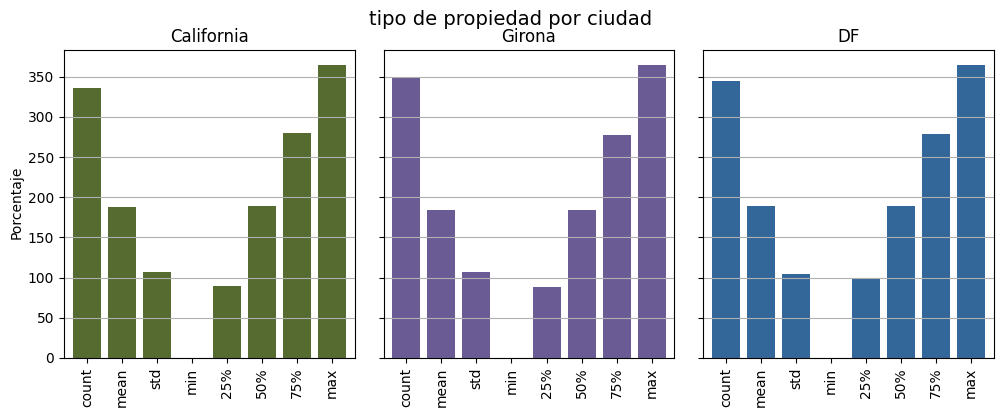

In [ ]:
fig, axs = plt.subplots(1, 3, figsize=(12,4), sharey=True)
plt.subplots_adjust(wspace=0.1)

df_grouped["availability_365"].plot(kind='bar', ax=axs[0], color= '#556B2F', width=0.8)
df_grouped2["availability_365"].plot(kind='bar', ax=axs[1], color= '#6B5B95', width=0.8)
df_grouped3["availability_365"].plot(kind='bar', ax=axs[2], color= '#336699', width=0.8)
axs[0].set_title('California')
axs[1].set_title('Girona')
axs[2].set_title('DF')
for ax in axs:
    ax.grid(axis='y')
# Agregamos títulos de los ejes
fig.text(0.08, 0.5, 'Porcentaje', va= 'center', rotation='vertical')
fig.suptitle('tipo de propiedad por ciudad ', fontsize=14)
plt.show()

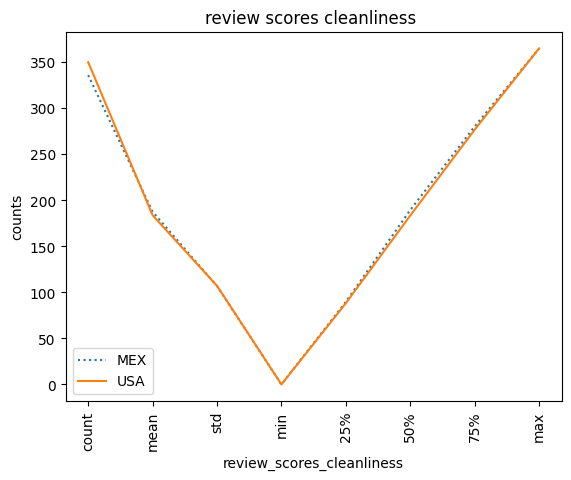

In [ ]:
import matplotlib.pyplot as plt
x=df_grouped['availability_365']
y=df_grouped2["availability_365"]
#z=df_grouped3["counts"]


plt.plot(x,label='MEX',linestyle="dotted")
plt.plot(y,label='USA')
#plt.plot(z,label='ESP',linestyle="dotted")


plt.ylabel("counts")
plt.xlabel("review_scores_cleanliness")

#agregar el nombre 
plt.legend()
plt.xticks(rotation=90)

plt.title("review scores cleanliness ")

plt.show()

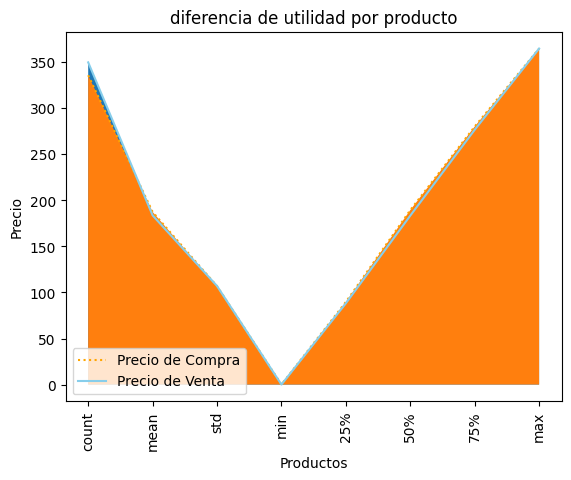

In [ ]:
x=df_grouped['availability_365']
y=df_grouped2['availability_365']

plt.ylabel("Precio")
plt.xlabel("Productos")

plt.plot(x,label='Precio de Compra',linestyle="dotted",color="orange")
plt.plot(y,label='Precio de Venta',color="skyblue")
plt.legend()

plt.fill_between(df_grouped2.index,y)
plt.fill_between(df_grouped.index,x)
plt.xticks(rotation=90)

plt.title("diferencia de utilidad por producto")

plt.show()

In [ ]:
df_combined = pd.groupby([df_describe1, df_describe2,df_describe3])
df_combined

AttributeError: ignored

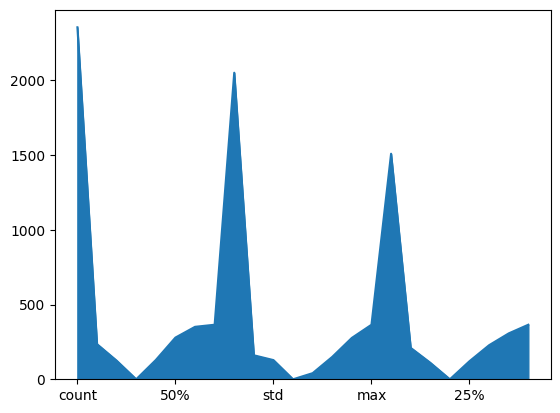

In [ ]:
df_combined.plot(kind='area', subplots=True)
plt.show()

##h) review scores communication


In [ ]:
mexico["review_scores_communication"]

0       4.95
1       5.00
2       4.92
3       4.90
4       4.78
        ... 
2350    4.94
2351    4.92
2352    4.90
2353    4.93
2354    4.90
Name: review_scores_communication, Length: 2355, dtype: float64

In [ ]:
df_grouped = mexico.groupby('review_scores_communication').size().reset_index(name='counts')
df_grouped=df_grouped.sort_values(by="review_scores_communication",ascending=False)
df_grouped.set_index('review_scores_communication', inplace=True)
df_grouped

In [ ]:
df_grouped2 = usa.groupby('review_scores_communication').size().reset_index(name='counts')
df_grouped2=df_grouped2.sort_values(by="review_scores_communication",ascending=False)
df_grouped2.set_index('review_scores_communication', inplace=True)
df_grouped2

In [ ]:
df_grouped3 = españa.groupby('review_scores_communication').size().reset_index(name='counts')
df_grouped3=df_grouped3.sort_values(by="review_scores_communication",ascending=False)
df_grouped3.set_index('review_scores_communication', inplace=True)
df_grouped3

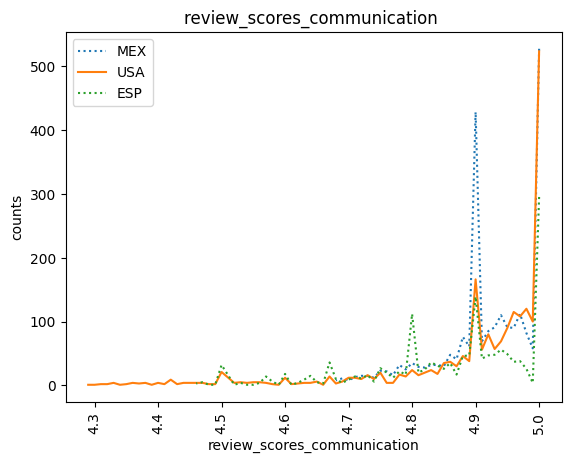

In [ ]:
import matplotlib.pyplot as plt
x=df_grouped['counts']
y=df_grouped2["counts"]
z=df_grouped3["counts"]


plt.plot(x,label='MEX',linestyle="dotted")
plt.plot(y,label='USA')
plt.plot(z,label='ESP',linestyle="dotted")


plt.ylabel("counts")
plt.xlabel("review_scores_communication")

#agregar el nombre 
plt.legend()
plt.xticks(rotation=90)

plt.title("review_scores_communication ")

plt.show()

**Revisar puntuaciones comunicación**

Al igual que la gráfica anterior en esta podemos observar las puntuaciones de comunicación que tuvieron las distintas ciudades donde observamos que la ciudad que tuvo una mejor puntuación fue California ya que tiene más conteos en la evaluación más alta que es de 5 seguida de México que tiene 4.9 con 400 conteos y por último España con la puntuación de cinco con 300 conteos sin embargo no se puso como la mejor ciudad en puntos de comunicación debido a que los conteos son menores

## b) host_acceptance_rate

In [ ]:
mexico["host_acceptance_rate"].info()

<class 'pandas.core.series.Series'>
RangeIndex: 2355 entries, 0 to 2354
Series name: host_acceptance_rate
Non-Null Count  Dtype 
--------------  ----- 
2355 non-null   object
dtypes: object(1)
memory usage: 18.5+ KB


In [ ]:
#Obtengo un análisis univariado de una variable categórica en específico
table1= freq_tbl(mexico['host_acceptance_rate'])
table1.set_index('host_acceptance_rate', inplace=True)
table1 = table1.rename(columns={'percentage': 'percentage_MEX'})
table1=table1.sort_values(by="percentage_MEX",ascending=False)
table1=table1.head(10)
table1

,frequency,percentage_MEX,cumulative_perc
host_acceptance_rate,,,
100%,839,0.356263,0.356263
sin registro,254,0.107856,0.464119
0%,178,0.075584,0.539703
99%,154,0.065393,0.605096
98%,92,0.039066,0.644161
97%,62,0.026327,0.670488
94%,56,0.023779,0.694268
93%,48,0.020382,0.714650
92%,44,0.018684,0.733333


In [ ]:
#Obtengo un análisis univariado de una variable categórica en específico
table2= freq_tbl(usa['host_acceptance_rate'])
table2.set_index('host_acceptance_rate', inplace=True)
table2 = table2.rename(columns={'percentage': 'percentage_MEX'})
table2=table2.sort_values(by="percentage_MEX",ascending=False)
table2=table2.head(10)
table2

,frequency,percentage_MEX,cumulative_perc
host_acceptance_rate,,,
100%,717,0.349586,0.349586
sin registro,263,0.128230,0.477816
97%,112,0.054608,0.532423
99%,85,0.041443,0.573866
98%,69,0.033642,0.607509
0%,62,0.030229,0.637738
91%,46,0.022428,0.660166
94%,43,0.020965,0.681131
95%,40,0.019503,0.700634


In [ ]:
#Obtengo un análisis univariado de una variable categórica en específico
table3= freq_tbl(españa['host_acceptance_rate'])
table3.set_index('host_acceptance_rate', inplace=True)
table3 = table3.rename(columns={'percentage': 'percentage_MEX'})
table3=table3.sort_values(by="percentage_MEX",ascending=False)
table3=table3.head(10)
table3

,frequency,percentage_MEX,cumulative_perc
host_acceptance_rate,,,
100%,488,0.323393,0.323393
sin registro,99,0.065606,0.388999
0%,79,0.052353,0.441352
91%,70,0.046388,0.487740
97%,65,0.043075,0.530815
99%,61,0.040424,0.571239
92%,43,0.028496,0.599735
67%,36,0.023857,0.623592
80%,33,0.021869,0.645461


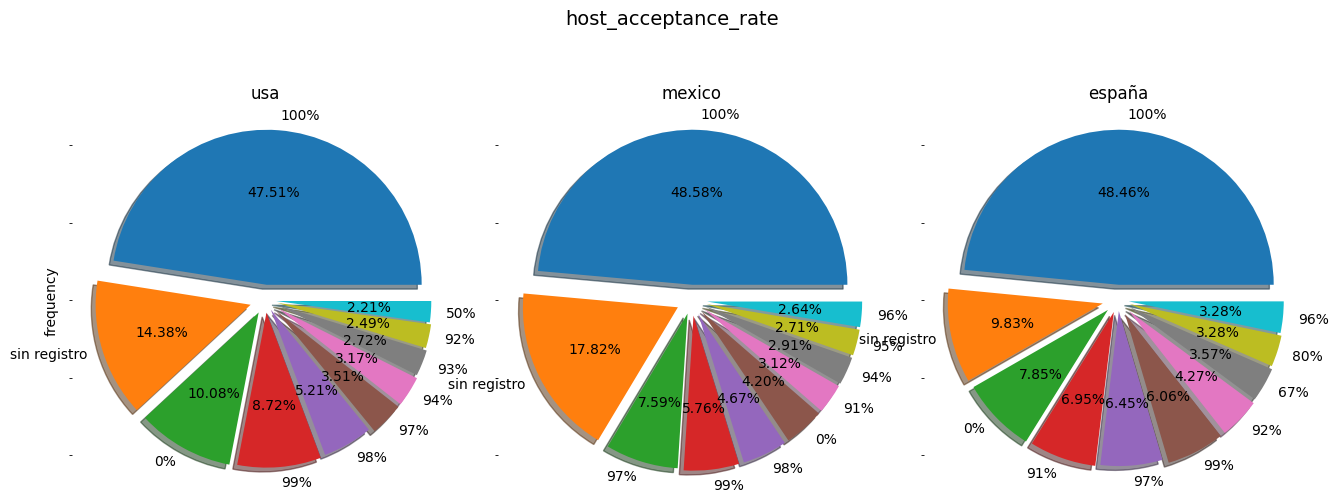

In [ ]:
#Realizamos grafico de barras del dataframe filtrado
#Gráfico de barras
fig, axs = plt.subplots(1, 3, figsize=(16,6), sharey=True)
plt.subplots_adjust(wspace=0.1)

table1["frequency"].plot(kind='pie', shadow=True,autopct="%1.2f%%", ax=axs[0],explode=(0.1,0.1,.09,.08,.07,0.1,0.1,.09,.08,.07))
table2["frequency"].plot(kind='pie', shadow=True,autopct="%1.2f%%", ax=axs[1],explode=(0.1,0.1,.09,.1,.1,0.1,0.1,.1,.1,.1))
table3["frequency"].plot(kind='pie',  shadow=True,autopct="%1.2f%%",ax=axs[2],explode=(0.1,0.1,.09,.08,.07,0.1,0.1,.09,.08,.07))
axs[0].set_title('usa')
axs[1].set_title('mexico')
axs[2].set_title('españa')

# Agregamos lineas guía en cada grafico
for ax in axs:
    ax.grid(axis='y')
    
# Agregamos títulos de los ejes
#fig.text(0.08, 0.5, 'Porcentaje', va= 'center', rotation='vertical')
fig.suptitle('host_acceptance_rate', fontsize=14)
plt.show()

**tasa_de_aceptación_del_host**

En esa gráfica podemos observar la diferencia de porcentajes de aceptación del host en las distintas ciudades donde observamos que la aceptación con 100% predomina en España ya que cuenta con un 48.46% esto quiere decir que el 48% de las viviendas aceptan al 100% de sus clientes mientras que en México solo lo hacen el 48.58% y en Estados Unidos El 47.51% mientras que en los otros porcentajes ya existe una gran variación ya que predominan distintos porcentajes eso se ve como en el ejemplo de España donde su siguiente porcentaje el relevante es del 91% con un valor de 6.97 %

## xxxx

In [ ]:
df_grouped2 = usa.groupby('review_scores_cleanliness').size().reset_index(name='counts')
df_grouped2=df_grouped.sort_values(by="counts",ascending=False)
df_grouped2=df_grouped.head(10)
df_grouped2

In [ ]:
#Obtengo un análisis univariado de una variable categórica en específico
table1= freq_tbl(mexico['review_scores_cleanliness'])
table1.set_index('review_scores_cleanliness', inplace=True)
table1 = table1.rename(columns={'percentage': 'percentage_MEX'})
# reducimos el numero de datos y solo dejamos las 10 columnas con mas frecuencias ya que consideramos las mas relevantes 
table1=table1.head(10)
table1

'No categorical variables to analyze.'

In [ ]:
sns.barplot(x='Categoría', y='Valor', data=df)


In [ ]:
df_a = pd.concat([españa["host_response_time"]], [mexico["host_response_time"]], [usa["host_response_time"]], axis=1)
df_a

<ipython-input-61-f22d03c57aeb>:1: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only.
  df_a = pd.concat([españa["host_response_time"]], [mexico["host_response_time"]], [usa["host_response_time"]], axis=1)


TypeError: ignored

In [ ]:
df_a = pd.concat([españa[["host_response_time","host_acceptance_rate"]], mexico[["host_response_time","host_acceptance_rate"]], usa[["host_response_time","host_acceptance_rate"]]], axis=1)
df_a

TypeError: ignored

In [ ]:
#Realizamos grafico de barras del dataframe filtrado
df_a.plot(kind = 'bar', width=1, figsize=(10,4))
plt.title('232_tipo_de_tienda')
plt.xlabel('Tipo de tienda')
plt.ylabel('Frecuencia')

TypeError: ignored

In [ ]:
españa["host_response_time"]

0           within an hour
1             within a day
2             within a day
3       within a few hours
4             sin registro
               ...        
1504        within an hour
1505    within a few hours
1506    within a few hours
1507          sin registro
1508          sin registro
Name: host_response_time, Length: 1509, dtype: object